In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

import arviz as az

In [2]:
with open('gravity_metropolis.p', 'rb') as f:
    metropolis = pickle.load(f)
    
with open('gravity_mlda.p', 'rb') as f:
    mlda = pickle.load(f)

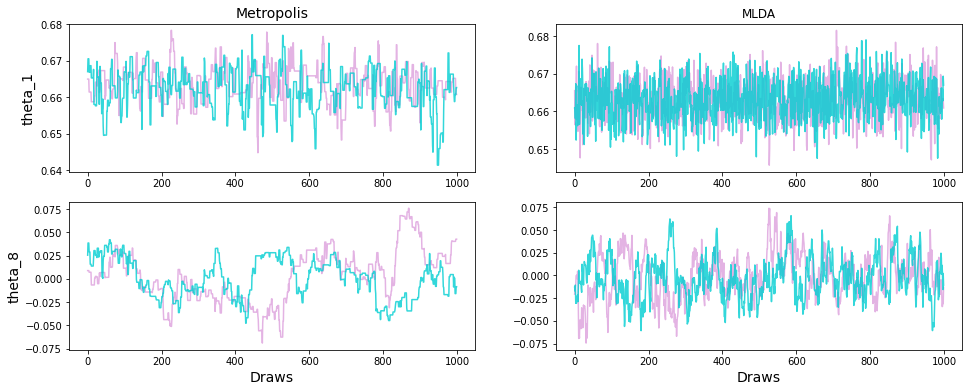

In [3]:
n_chains = 2
n_draws = 1000

fontsize = 14
#cmap = matplotlib.cm.get_cmap('Set2')
#cmap_indices = [1,2,4,5]
colors = ['plum', 'darkturquoise']
alpha = 0.8
thetas = [0,7]

fig, axes = plt.subplots(2,2, figsize=(16,6))
for i in range(n_chains):
    
    axes[0,0].set_title('Metropolis', fontsize=fontsize)
    axes[0,0].plot(metropolis['trace'][i*n_draws:(i+1)*n_draws,thetas[0]], c=colors[i], alpha=alpha)
    axes[0,0].set_ylabel('theta_{}'.format(thetas[0]+1), fontsize=fontsize)
    axes[1,0].plot(metropolis['trace'][i*n_draws:(i+1)*n_draws,thetas[1]], c=colors[i], alpha=alpha)
    axes[1,0].set_ylabel('theta_{}'.format(thetas[1]+1), fontsize=fontsize)
    axes[1,0].set_xlabel('Draws', fontsize=fontsize)
    
    axes[0,1].set_title('MLDA')
    axes[0,1].plot(mlda['trace'][i*n_draws:(i+1)*n_draws,thetas[0]], c=colors[i], alpha=alpha)
    axes[1,1].plot(mlda['trace'][i*n_draws:(i+1)*n_draws,thetas[1]], c=colors[i], alpha=alpha)
    axes[1,1].set_xlabel('Draws', fontsize=fontsize)
#plt.show()
plt.savefig('gravity_traces.pdf', bbox_inches='tight')

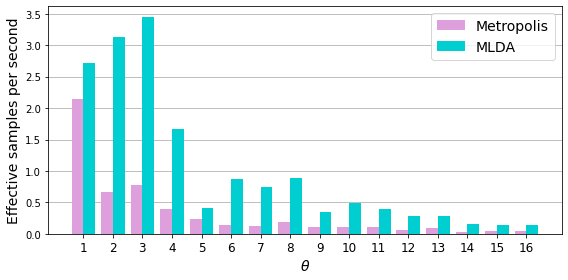

In [4]:
fontsize = 14
#cmap = matplotlib.cm.get_cmap('Set2')
colors = ['plum', 'darkturquoise']
pars = 16

labels = ['{}'.format(i) for i in range(1, pars+1)]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - width/2, metropolis['performance'][0][:pars], width, label='Metropolis', color=colors[0], zorder=3)
rects2 = ax.bar(x + width/2, mlda['performance'][0][:pars], width, label='MLDA', color=colors[1], zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Effective samples per second', fontsize=fontsize)
ax.set_xlabel('$\\theta$', fontsize=fontsize)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=fontsize-2)
ax.legend(fontsize=fontsize)

fig.tight_layout()
plt.grid(axis='y', zorder=0)
plt.savefig('gravity_performance.pdf', bbox_inches='tight', dpi=300)